# Linear Regression: Implemnetations


## Step 1: Import Libaries and dataset
- i have use calafornia dataset for this(i thought of using bostons but it got discontinued)

In [234]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing

## Step 2: Load the California Housing dataset

In [237]:
data = fetch_california_housing()
X = data.data
y = data.target
feature_names = data.feature_names
print(feature_names)
df = pd.DataFrame(X, columns=feature_names)
df = df.drop(columns=['Latitude'])
X = df.values

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


## Step 3: Split the data into training and test sets (80% train, 20% test)


In [240]:
train_size = int(0.8 * X.shape[0])
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

## Step 4: Feature Scaling (Standardization) 
 Standardize the features: (X - mean) / std

In [243]:
def standardize(X):
    mean = X.mean(axis=0)
    std = X.std(axis=0)
    return (X - mean) / std

X_train = standardize(X_train)
X_test = standardize(X_test)

# Add a column of ones to X for the intercept term (theta_0)
X_train_b = np.c_[np.ones((X_train.shape[0], 1)), X_train]  # Add bias term (intercept)
X_test_b = np.c_[np.ones((X_test.shape[0], 1)), X_test]  # Add bias term (intercept)


## Step 5: Gradient Descent Implementation
1. **Update Rule:**
   $$
   \boldsymbol{\beta} \leftarrow \boldsymbol{\beta} - \alpha \nabla J(\boldsymbol{\beta})
   $$

   Where:
   - $\alpha$: Learning rate.
   - $\nabla J(\boldsymbol{\beta})$: Gradient of the cost function.

2. **Gradient of Cost Function:**
   $$
   \nabla J(\boldsymbol{\beta}) = \frac{1}{n} \mathbf{X}^T (\mathbf{X} \boldsymbol{\beta} - \mathbf{y})
   $$

In [246]:
def gradient_descent(X, y, theta, learning_rate, iterations):
    m = len(y)
    cost_history = []  # To store the cost at each iteration
    for _ in range(iterations):
        predictions = X.dot(theta)
        error = predictions - y
        cost = (1 / (2 * m)) * np.sum(error ** 2)  # Cost function (MSE)
        cost_history.append(cost)
        gradients = (1 / m) * X.T.dot(error)  # Derivative of the cost function
        theta = theta - learning_rate * gradients  # Update the parameters
    return theta, cost_history

## Step 6: Initialize parameters and set hyperparameters

In [249]:
theta_init = np.zeros(X_train_b.shape[1])  # Initial theta values (including intercept)
learning_rate = 0.1
iterations = 150

## Step 7: Train the model using gradient descent

In [252]:
theta_optimal, cost_history = gradient_descent(X_train_b, y_train, theta_init, learning_rate, iterations)

## Step 8: Make Predictions

In [255]:
y_pred_train = X_train_b.dot(theta_optimal)
y_pred_test = X_test_b.dot(theta_optimal)

## Step 9: Evaluate the Model using Mean Squared Error (MSE)

In [258]:
def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)
train_mse = mean_squared_error(y_train, y_pred_train)
test_mse = mean_squared_error(y_test, y_pred_test)

print(f"Training MSE: {train_mse:.4f}")
print(f"Testing MSE: {test_mse:.4f}")

Training MSE: 0.6155
Testing MSE: 0.7112


In [260]:
# R² (Coefficient of Determination)
def r2_score(y_true, y_pred):
    total_variance = np.sum((y_true - np.mean(y_true)) ** 2)
    residual_variance = np.sum((y_true - y_pred) ** 2)
    return 1 - (residual_variance / total_variance)

train_r2 = r2_score(y_train, y_pred_train)
test_r2 = r2_score(y_test, y_pred_test)

# Standard Error of Estimate
def standard_error(y_true, y_pred, p):
    residuals = y_true - y_pred
    se = np.sqrt(np.sum(residuals ** 2) / (len(y_true) - p))
    return se
print(f"Training R²: {train_r2:.4f}")
print(f"Testing R²: {test_r2:.4f}")

Training R²: 0.5224
Testing R²: 0.5119


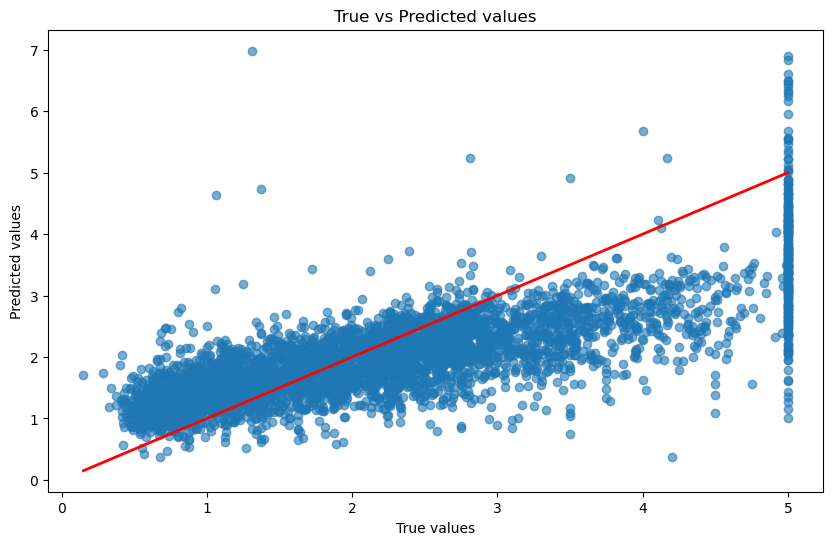

In [262]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_test, alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)
plt.title("True vs Predicted values")
plt.xlabel("True values")
plt.ylabel("Predicted values")
plt.show()

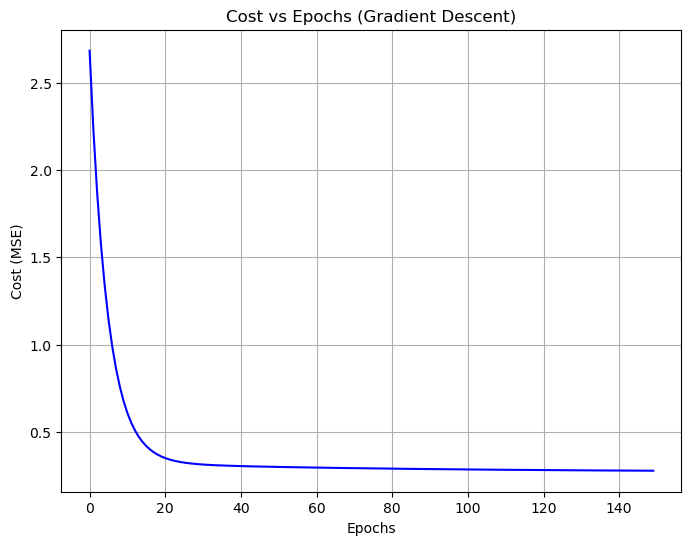

In [230]:
plt.figure(figsize=(8, 6))
plt.plot(range(iterations), cost_history, color='blue')
plt.title("Cost vs Epochs (Gradient Descent)")
plt.xlabel("Epochs")
plt.ylabel("Cost (MSE)")
plt.grid(True)
plt.show()

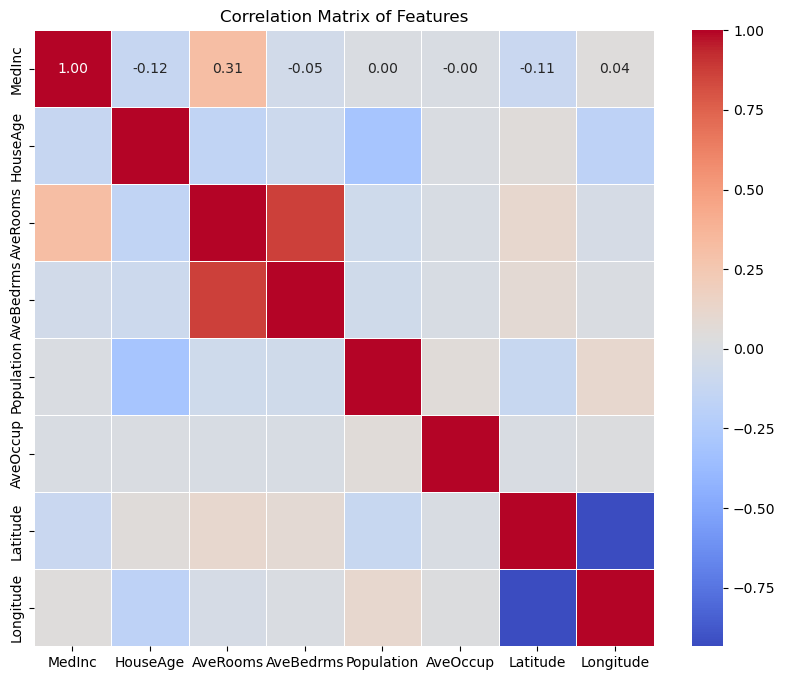

In [232]:
import seaborn as sns
import pandas as pd

# Create a DataFrame from the training set for easier visualization
df_train = pd.DataFrame(X_train, columns=data.feature_names)

# Compute the correlation matrix
correlation_matrix = df_train.corr()

# Plot the correlation matrix using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Matrix of Features")
plt.show()